# Covid-19 time series data

The goal of this task is to visualize the [Covid-19 data provided by WHO](https://covid19.who.int/data). 

We will download the dataset of daily cases and deaths reported to WHO under the following link:

[https://covid19.who.int/WHO-COVID-19-global-data.csv](https://covid19.who.int/WHO-COVID-19-global-data.csv)

In [19]:
import os
import numpy as np
import pandas as pd

%pylab inline
%config InlineBackend.figure_format='svg'

Populating the interactive namespace from numpy and matplotlib


As we have done before, we will in general download this data only if we have not already done so. However, keep in mind that this data is constantly updated. In order to enforce a new download we implement a switch `force_update` that whenever set to `True` will conduct a new download of the data.

In [20]:
force_update = False

Here is our old data loading code, now slightly modified to include the switch above:

In [21]:
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
file_name = 'covid19_global_data.csv'

if os.path.exists(file_name) and force_update == False:
    print(f'Loading data from local file `{file_name}`...')
    df = pd.read_csv(file_name, parse_dates=['Date_reported'])
else:
    print(f'Loading data from `{url}`...')
    df = pd.read_csv(url, parse_dates=['Date_reported'])
    df.to_csv(file_name)
print('Done.')

Loading data from local file `covid19_global_data.csv`...
Done.


In [22]:
df

,Unnamed: 0,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...,...
200497,200497,2022-04-23,ZW,Zimbabwe,AFRO,63,247488,0,5468
200498,200498,2022-04-24,ZW,Zimbabwe,AFRO,36,247524,0,5468
200499,200499,2022-04-25,ZW,Zimbabwe,AFRO,30,247554,0,5468
200500,200500,2022-04-26,ZW,Zimbabwe,AFRO,44,247598,0,5468


Text(0.5, 1.0, 'Ukraine')

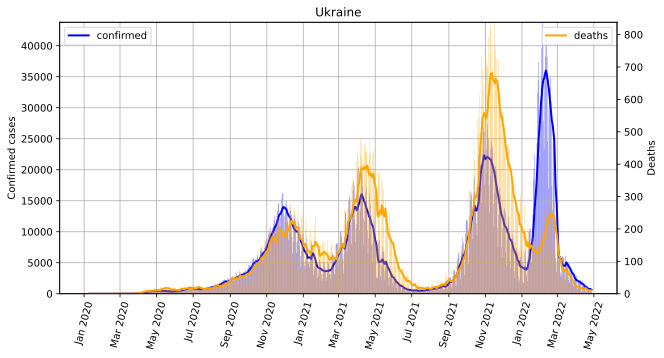

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()

country = 'Ukraine'

country_df = df[df['Country']==country].copy()
country_df['Date_reported'] = pd.to_datetime(country_df['Date_reported'])

ax.bar(country_df['Date_reported'], country_df['New_cases'],
       color='blue', alpha=0.5)
ax2.bar(country_df['Date_reported'], country_df['New_deaths'],
         color='orange', alpha=0.5)

ax.plot(country_df['Date_reported'], country_df['New_cases'].rolling(window=7).mean(),
       color='blue', label='confirmed', linewidth=2)
ax2.plot(country_df['Date_reported'], country_df['New_deaths'].rolling(window=7).mean(),
         color='orange', label='deaths', linewidth=2)

ax.set_ylabel('Confirmed cases')
ax.set_ylim([0,country_df['New_cases'].max()])

ax2.set_ylabel('Deaths')
ax2.set_ylim([0,country_df['New_deaths'].max()])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=75)

ax.legend()
ax2.legend()
ax.grid()

ax.set_title(country)

plt.savefig('fig.png')

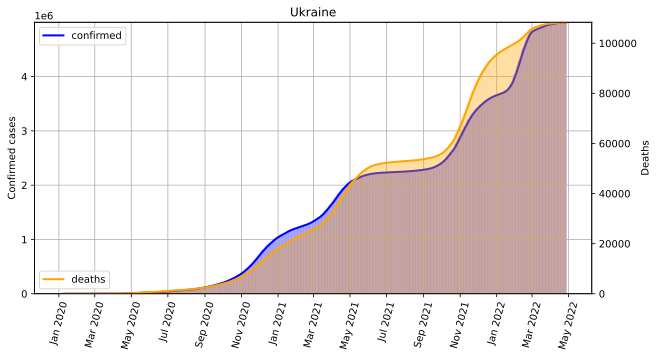

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()

country = 'Ukraine'

country_df = df[df['Country']==country].copy()
country_df['Date_reported'] = pd.to_datetime(country_df['Date_reported'])


ax.bar(country_df['Date_reported'], country_df['Cumulative_cases'],
       color='blue', alpha=0.5)
ax2.bar(country_df['Date_reported'], country_df['Cumulative_deaths'],
         color='orange', alpha=0.5)

ax.plot(country_df['Date_reported'], country_df['Cumulative_cases'].rolling(window=7).mean(),
       color='blue', label='confirmed', linewidth=2)
ax2.plot(country_df['Date_reported'], country_df['Cumulative_deaths'].rolling(window=7).mean(),
         color='orange', label='deaths', linewidth=2)


ax.set_ylabel('Confirmed cases')
ax.set_ylim([0,country_df['Cumulative_cases'].max()])

ax2.set_ylabel('Deaths')
ax2.set_ylim([0,country_df['Cumulative_deaths'].max()])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=75)

ax.legend(loc='upper left')
ax2.legend(loc='lower left')
ax.grid()


ax.set_title(country)

plt.savefig('fig2.png')